In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8660 - loss: 0.4813
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9640 - loss: 0.1147
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9751 - loss: 0.0754
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9838 - loss: 0.0509
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9880 - loss: 0.0385
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9912 - loss: 0.0285
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9934 - loss: 0.0211
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9942 - loss: 0.0170
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9948 - loss: 0.0156
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9959 - loss: 0.0125


In [11]:
model.save('NumNet.keras')

In [12]:
model = tf.keras.models.load_model('NumNet.keras')

In [13]:
loss , accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.1106
Loss: 0.10386046022176743, Accuracy: 0.9761000275611877


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
This digit is probably 1


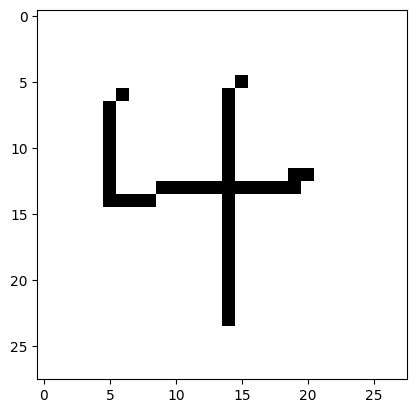

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This digit is probably 2


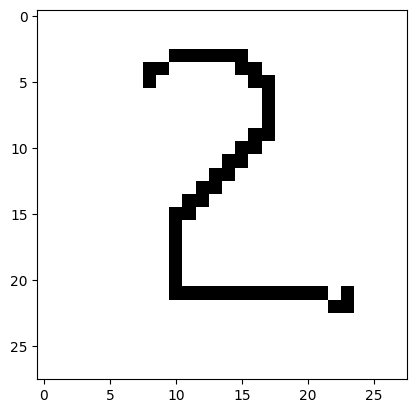

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably 2


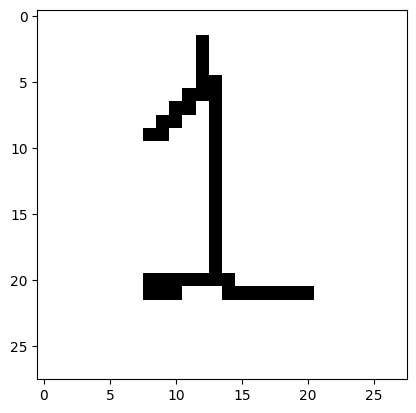

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably 1


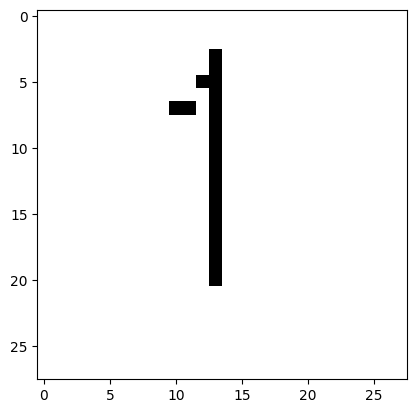

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably 4


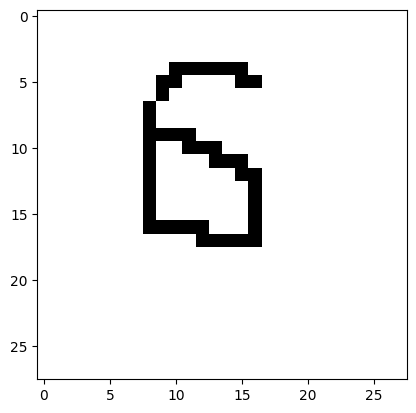

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This digit is probably 3


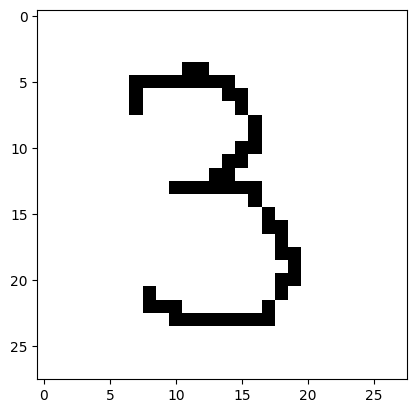

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This digit is probably 5


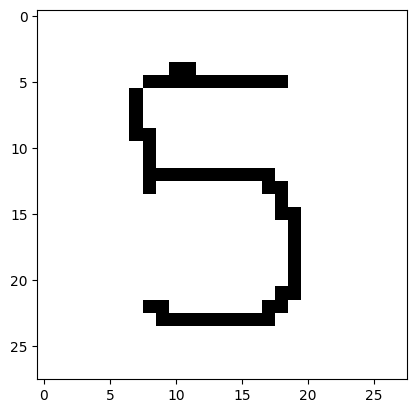

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This digit is probably 2


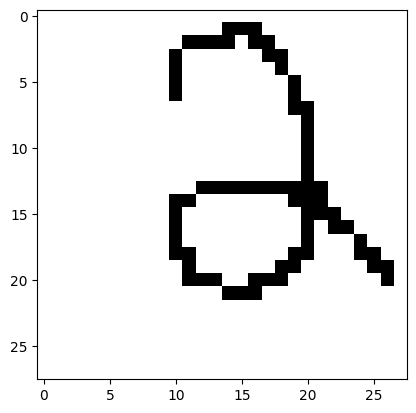

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably 4


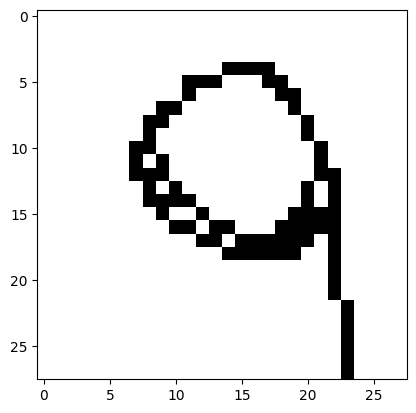

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably 8


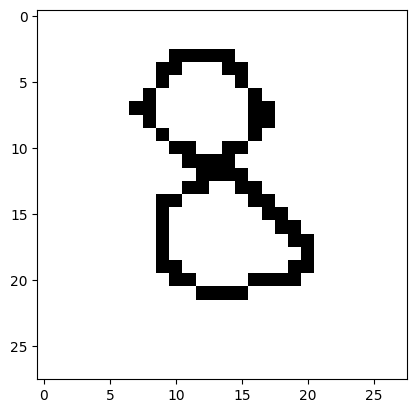

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably 2


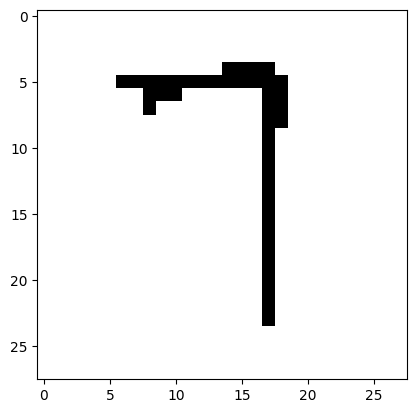

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This digit is probably 1


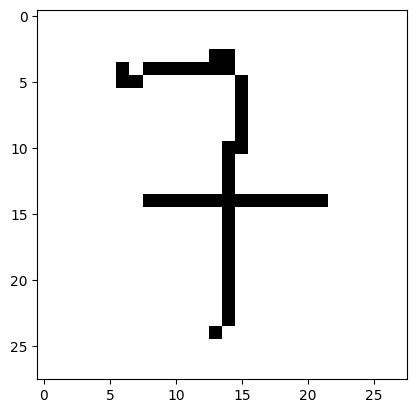

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably 7


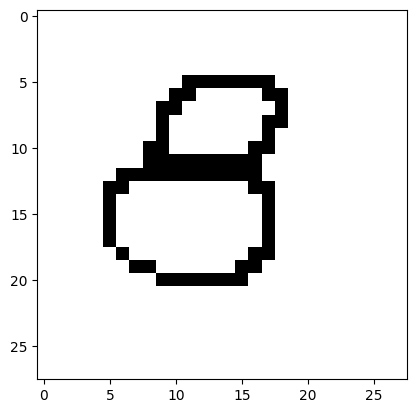

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This digit is probably 9


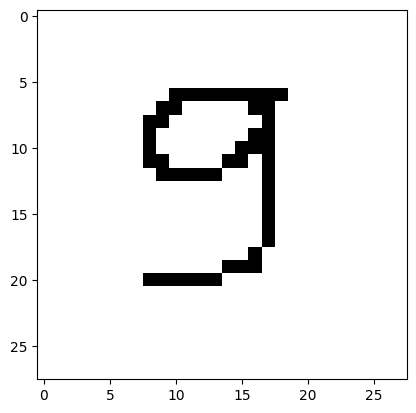

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This digit is probably 0


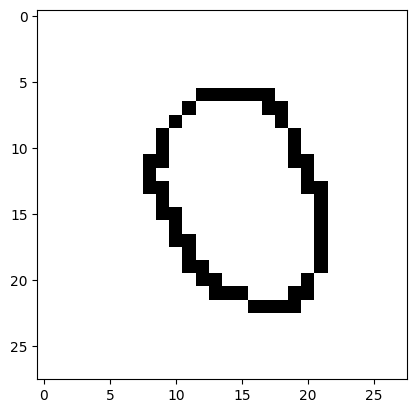

In [14]:

image_number = 1
while os.path.isfile(f'digits/digit{image_number}.png'):
    try:
        img = cv.imread(f'digits/digit{image_number}.png', cv.IMREAD_GRAYSCALE)
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f'This digit is probably {np.argmax(prediction)}')
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print(f'Error processing digit{image_number}.png: {e}')
    finally:
        image_number += 1